In [1]:
from omas import *
import numpy as np
import matplotlib.pyplot as plt
import os
import vest
from pathlib import Path

In [2]:
# Load the OMAS data from 
# ods = ods.sample()
ods = vest.omas.sample_ods()
odc = vest.omas.sample_odc()

### Plotting Temporal Signals

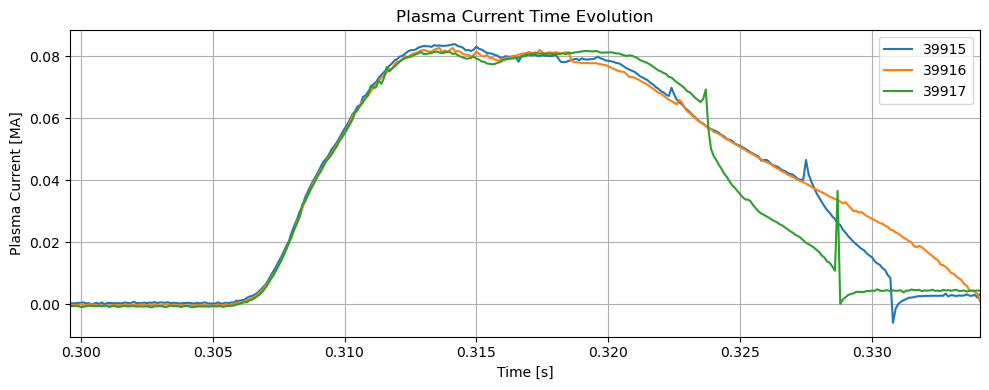

In [3]:
vest.plot.magnetics_time_ip(odc)

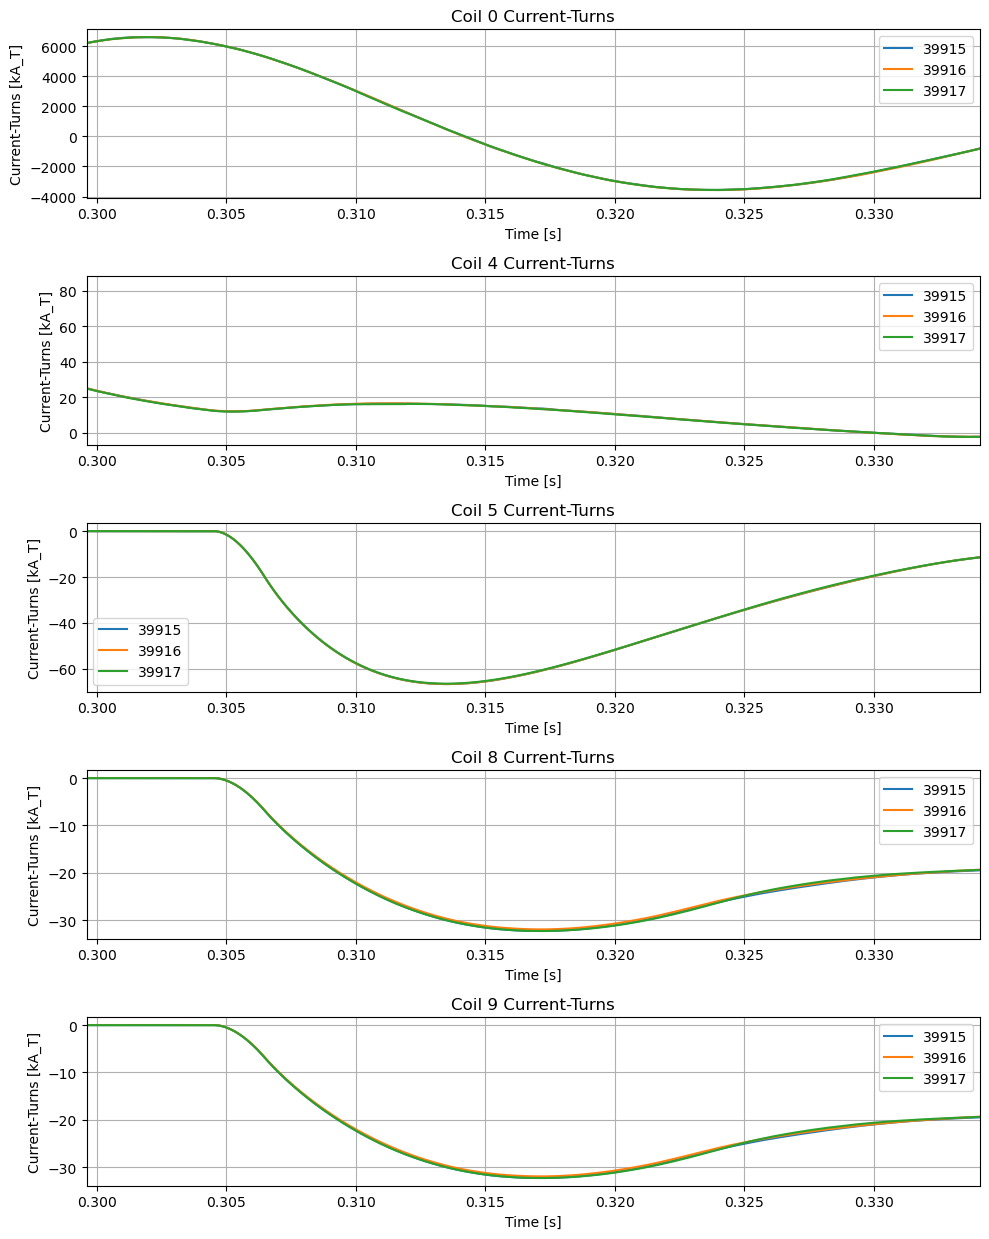

In [4]:
# vest.plot.pf_active_time_current(odc)
vest.plot.pf_active_time_current_turns(odc)

# vest.plot.pf_active_time_current(odc , indices = [0,4], yunit = 'kA')

In [5]:
vest.plot.pf_passive_time_current(odc)

AttributeError: module 'vest.plot' has no attribute 'pf_passive_time_current'

In [ ]:
vest.plot.barometry_time_pressure(odc)

### Plotting 1D Profiles

rho_tor_norm
psi_norm
r_norm



vacuum field map

coil map

filament map


In [41]:

# psi_norm
for i in range(len(ods['equilibrium.time_slice'])):
    ods['equilibrium.time_slice'][i]['profiles_1d.psi_norm'] = (
        ods['equilibrium.time_slice'][i]['profiles_1d.psi'] - ods['equilibrium.time_slice'][i]['global_quantities.psi_axis']
    ) / (
        ods['equilibrium.time_slice'][i]['global_quantities.psi_boundary'] - ods['equilibrium.time_slice'][i]['global_quantities.psi_axis']
    )




['r', 'z']


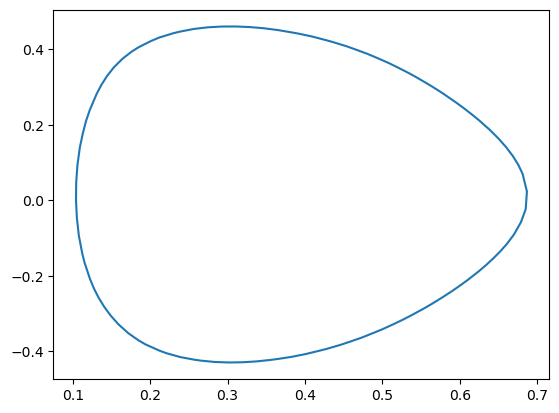

In [ ]:
print(ods['equilibrium.time_slice.0.boundary.outline'].keys())

# plot the outline
plt.figure()
plt.plot(ods['equilibrium.time_slice.0.boundary.outline.r'], ods['equilibrium.time_slice.0.boundary.outline.z'])
plt.show()

# find minimum r value
r_min = np.min(ods['equilibrium.time_slice.0.boundary.outline.r'])
r_max = np.max(ods['equilibrium.time_slice.0.boundary.outline.r'])





In [45]:
print(ods['equilibrium.time_slice.0.global_quantities.magnetic_axis.z'])

# # find most Adjacent to z=0 index in dim2
# z0_index = np.argmin(np.abs(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim2'] - 0))





0.0234370815


['area', 'b_field_average', 'b_field_max', 'b_field_min', 'centroid', 'darea_dpsi', 'darea_drho_tor', 'dpressure_dpsi', 'dpsi_drho_tor', 'dvolume_dpsi', 'dvolume_drho_tor', 'elongation', 'f', 'f_df_dpsi', 'geometric_axis', 'gm1', 'gm2', 'gm5', 'gm8', 'gm9', 'j_tor', 'phi', 'pressure', 'psi', 'q', 'r_inboard', 'r_outboard', 'rho_tor', 'rho_tor_norm', 'squareness_lower_inner', 'squareness_lower_outer', 'squareness_upper_inner', 'squareness_upper_outer', 'surface', 'trapped_fraction', 'triangularity_lower', 'triangularity_upper', 'volume', 'psi_norm']
[ 0.00347445  0.00386103  0.00360271  0.00313315  0.0026562   0.00218413
  0.00166556  0.00110113  0.00049054 -0.00016215 -0.00085254 -0.0015759
 -0.00232732 -0.00310176 -0.00389411 -0.00469931 -0.00551237 -0.00632842
 -0.0071428  -0.00795105 -0.00874896 -0.00953259 -0.01029829 -0.01104271
 -0.01176276 -0.01245566 -0.0131189  -0.01375025 -0.01434771 -0.01490951
 -0.0154341  -0.01592011 -0.01636635 -0.01677175 -0.0171354  -0.01745645
 -0.0177

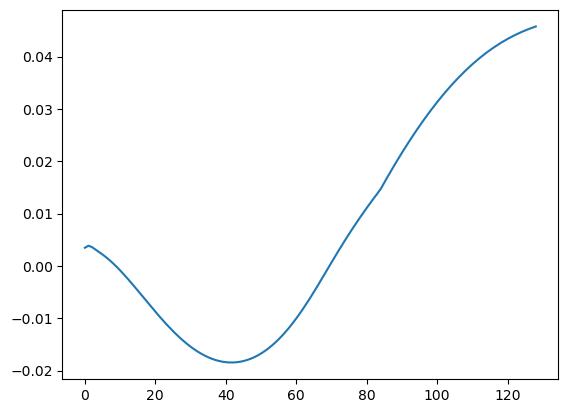

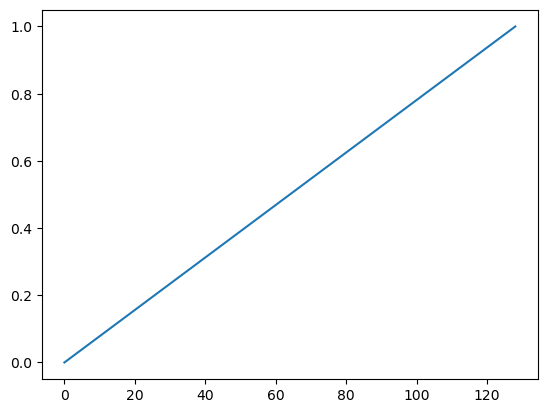

In [ ]:
print(ods['equilibrium.time_slice.0.profiles_1d'].keys())

# print(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim1']) # radial coordinate
# print(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim2']) # vertical coordinate




# find z index at magnetic axis
z_r_mag_index = np.argmin(np.abs(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim2'] - ods['equilibrium.time_slice.0.global_quantities.magnetic_axis.z']))

# find minimum r value and maximum r value in plasma boundary
r_min = np.min(ods['equilibrium.time_slice.0.boundary.outline.r'])
r_max = np.max(ods['equilibrium.time_slice.0.boundary.outline.r'])

print(ods['equilibrium.time_slice.0.profiles_2d.0.psi'][:,z_r_mag_index])

# extract the radial coordinate from the 2d psi profile

radial_psi = ods['equilibrium.time_slice.0.profiles_2d.0.psi'][:,z_r_mag_index]

# find the index of r_min and r_max in the 2d psi profile
r_min_index = np.argmin(np.abs(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim1'] - r_min))
r_max_index = np.argmin(np.abs(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim1'] - r_max))

# find the index of r_mag in the 2d psi profile
r_mag_index = np.argmin(np.abs(ods['equilibrium.time_slice.0.profiles_2d.0.grid.dim1'] - ods['equilibrium.time_slice.0.global_quantities.magnetic_axis.r']))

# Truncate the 2d psi profile to the range of r_min to r_mag and r_mag to r_max
radial_psi_inboard = radial_psi[r_min_index:z_r_mag_index]
radial_psi_outboard = radial_psi[z_r_mag_index:r_max_index]












# we need to update ods['equilibrium.time_slice.0.profiles_1d.r_inboard'] and ods['equilibrium.time_slice.0.profiles_1d.r_outboard'] by mapping the inboard and outboard radial coordinates based on 2d psi profile










In [6]:
def onedim_radial_equilibrium_q(ods, time_slice=None):
    """Plot safety factor q profile from equilibrium data."""

        # Get q profile data
    q = ods[f'equilibrium.time_slice.{time_slice}.profiles_1d.q']

    # Get rho coordinate and convert to radial coordinate
    rho = ods[f'equilibrium.time_slice.{time_slice}.profiles_1d.rho_tor'] # Rho coordinate
    # r = rho_to_radial(
    
    plt.figure()
    plt.plot(r, q)
    plt.xlabel("Normalized radius ρ")
    plt.ylabel("Safety factor q")
    plt.title(f"Safety Factor Profile at t={time_slice}")
    plt.grid(True)

onedim_radial_equilibrium_q(ods)


TypeError: Cannot convert from list to dict once ODS has data

### Plotting 2D Profiles

### Plotting Animation Signals (Camera)